# Importing Libraries & Data

In [47]:
import numpy as np
import pandas as pd
import nltk
import textblob as blob
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessor as p
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [48]:
data = pd.read_csv('data.csv')

# EDA / Cleaning

In [49]:
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


(array([ 691.,    0.,  310.,    0.,    0.,  884.,    0., 2365.,    0.,
        5726.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

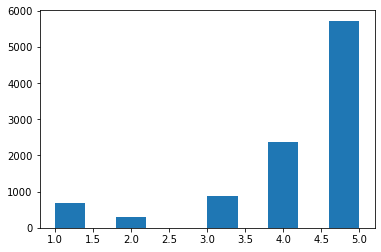

In [50]:
plt.hist(data['rating'])

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
review    9976 non-null object
rating    9976 non-null int64
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


In [52]:
data.describe()

,rating
count,9976.000000
mean,4.215417
std,1.167911
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [53]:
def target(x):
    if x > 4:
        return 1
    else:
        return 0
    
data['target'] = data['rating'].apply(lambda x: target(x))
data

,review,rating,target
0,It was nice produt. I like it's design a lot. ...,5,1
1,awesome sound....very pretty to see this nd th...,5,1
2,awesome sound quality. pros 7-8 hrs of battery...,4,0
3,I think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1
...,...,...,...
9971,GoodREAD MORE,5,1
9972,Everything is amazimg but the built is very li...,5,1
9973,GoodREAD MORE,5,1
9974,Best headphone i have ever used....READ MORE,5,1


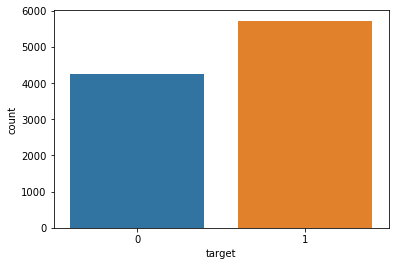

In [54]:
sns.countplot(data['target'])

In [55]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [58]:
import re
import string


def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


data['Processed review'] = data['review'].apply(lambda x : text_clean_1(x))
data.head()

,review,rating,target,Processed review
0,It was nice produt. I like it's design a lot. ...,5,1,it was nice produt i like its design a lot it...
1,awesome sound....very pretty to see this nd th...,5,1,awesome soundvery pretty to see this nd the so...
2,awesome sound quality. pros 7-8 hrs of battery...,4,0,awesome sound quality pros hrs of battery lif...
3,I think it is such a good product not only as ...,5,1,i think it is such a good product not only as ...
4,awesome bass sound quality very good bettary l...,5,1,awesome bass sound quality very good bettary l...


In [59]:
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

data['Processed review'] = data['Processed review'].apply(lambda x : text_clean_2(x))
data.head()

,review,rating,target,Processed review
0,It was nice produt. I like it's design a lot. ...,5,1,it was nice produt i like its design a lot it...
1,awesome sound....very pretty to see this nd th...,5,1,awesome soundvery pretty to see this nd the so...
2,awesome sound quality. pros 7-8 hrs of battery...,4,0,awesome sound quality pros hrs of battery lif...
3,I think it is such a good product not only as ...,5,1,i think it is such a good product not only as ...
4,awesome bass sound quality very good bettary l...,5,1,awesome bass sound quality very good bettary l...


In [61]:
data['Processed review'] = data['Processed review'].apply(lambda x : p.clean(x))

In [65]:
data['Processed review'][14]

'reson for star sounds for alerts for connection low battery incoming calls etc plays at times of volume then the volume that we usually hear anything on headphones these notification plays at sound level that everyone in the room will hear it imagine it playing when u r wearing this headphones its like a blast in ur ears out of nowhere when it plays like that loud when im wearing it i wish to throw it awayreason why i hvnt thrown it away yet decent sound quality and baread more'

# Sentiment Analysis

In [67]:
df = data[['Processed review' , 'target']]
df.head()

,Processed review,target
0,it was nice produt i like its design a lot its...,1
1,awesome soundvery pretty to see this nd the so...,1
2,awesome sound quality pros hrs of battery life...,0
3,i think it is such a good product not only as ...,1
4,awesome bass sound quality very good bettary l...,1


In [71]:
df['subjectivity'] = df['Processed review'].apply(lambda x: blob.TextBlob(x).sentiment[1])
df['polarity'] = df['Processed review'].apply(lambda x: blob.TextBlob(x).sentiment[0])

In [72]:
df.head()

,Processed review,target,subjectivity,polarity
0,it was nice produt i like its design a lot its...,1,0.777778,0.511111
1,awesome soundvery pretty to see this nd the so...,1,0.716667,0.591667
2,awesome sound quality pros hrs of battery life...,0,0.509356,0.292731
3,i think it is such a good product not only as ...,1,0.515385,0.300000
4,awesome bass sound quality very good bettary l...,1,0.597500,0.351250


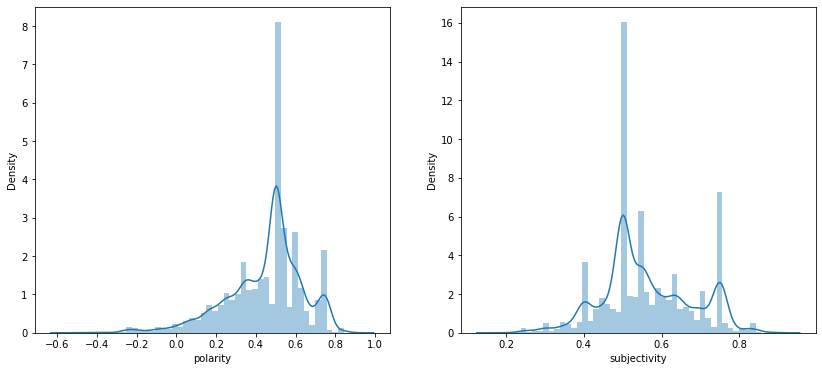

In [130]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.distplot(df['polarity'])
plt.subplot(1,2,2)
sns.distplot(df['subjectivity'])

In [131]:
m = 1298
print('Review : \n' + data['review'][m] + '\n\n' + 'Polarity : ' + str(df['polarity'][m]) + '\n\n' + 'Subjetivity : ' + str(df['subjectivity'][m]))

Review : 
this is my first boat...  I already own 6 headphones senieser, Sony, Philips, skullcandy ,inear Sony, jbl etc.  after experiencing all this well-known brands...  I never expected this amazing output from boat, at this price  point.. it's different to hear all my favorite tracks again in this piece and.... enjoying.. a small tip- laptop or mobile,dont go for the equalizer or bass boosted..  just play it flat.. and quality tracks 320kbps or higher flac's.. the results will blow your mindREAD MORE

Polarity : 0.2354166666666667

Subjetivity : 0.5715277777777777


In [144]:
df[df['polarity'] < 0].describe()

,target,subjectivity,polarity
count,264.00000,264.000000,264.000000
mean,0.05303,0.622385,-0.145109
std,0.22452,0.120790,0.104704
min,0.00000,0.246667,-0.540000
25%,0.00000,0.555000,-0.212857
50%,0.00000,0.633333,-0.112500
75%,0.00000,0.721795,-0.059524
max,1.00000,0.875000,-0.002597
